Nim examples and notes on this kernel
============

In [1]:
echo "hello world!"

hello world!


Import
------------
If the host system as the correct package installed, you can use `import` like normal

In [2]:
import math
var x = 5.0
echo x.pow(2.0)

25.0


In [3]:
import sequtils
var s : seq[char] = toSeq("hello notebook!".items)
var z : seq[char] = toSeq("!koobeton olleh".items)
echo zip(s,z)

@[(a: h, b: !), (a: e, b: k), (a: l, b: o), (a: l, b: o), (a: o, b: b), (a:  , b: e), (a: n, b: t), (a: o, b: o), (a: t, b: n), (a: e, b:  ), (a: b, b: o), (a: o, b: l), (a: o, b: l), (a: k, b: e), (a: !, b: h)]


## How to show the tempfile name
Show tempfile name for this cell which happens to be the module name and therefor has a limited charset


In [4]:
template FILE: string = instantiationInfo().filename

echo "Module tempfile: '" & FILE() & "'"

Module tempfile: 'block4.nim'


## Every block  is separate, kind of
For now, every block is considered a separate `.nim` file.
As an example, we can't access `x` from block 2

In [5]:
echo x

block5.nim(3, 6) Error: undeclared identifier: 'x'


See? We got `undeclared identifier: 'x'`  
But if we export it:

In [6]:
var x* = 12

Then we can use it in subsequent blocks:

In [7]:
echo x

12


## Simple procs

In [8]:
proc square(x:int):int =
    result = x*x

echo square(5)

25


## Unicode identifiers

In [9]:
proc `×` (a,b:int):int = 
    result = a*b
echo ×(32, 12)

384


## Json parsing

In [10]:
import json
 
var data = parseJson("""{ "foo": 1, "bar": [10, "apples"] }""")
echo data["foo"]
echo data["bar"]
 
var js = %[%{"name": %"John", "age": %30}, %{"name": %"Susan", "age": %31}]
echo js

1
[10,"apples"]
[{"name":"John","age":30},{"name":"Susan","age":31}]


Plotting
========

For, a single plot for block is available.

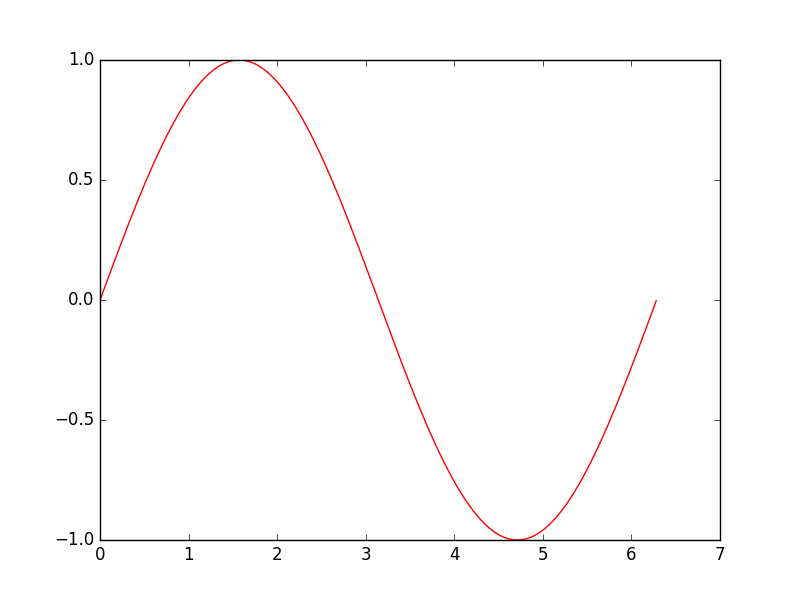

Loaded dynamic library: 'python35.dll'
0


In [11]:
#>inlineplot
import math,sequtils

iterator linsp*[T](fm,to,step:T):T =
    if fm<to:
      var res: T = T(fm)
      while res<=to:
        yield res
        res+=step
    elif fm>to:
      var res: T = T(fm)
      while res>=to:
        yield res
        res-=step
    else:
      yield fm
    

proc linspace* [T](fm,to,step:T):seq[T] = toSeq(linsp(fm, to, step)) # Result and step should be same type, not all 4


proc sin (x:openarray[float]):seq[float] =
  result = map(x) do (x:float)->float : 
    sin(x)

let xx = linspace(0.0,2*Pi,0.01)

show:
    plot(xx,sin(xx))